In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from importlib import reload
%matplotlib inline

import base
import utility

In [2]:
if True:
    data = pd.read_csv('fx_data/2009_early2018_USD_JPY_1h.csv', header=0)
    data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)

In [3]:
len(data)

54005

In [4]:
reload(base)
ta = None

r_periods = [6, 24, 120, 240, 480, 2400]
ta = base.TechnicalAnalysisCase(data)
ta.add_returns(r_periods)

ma_periods = [12, 24, 120, 240]
ta.add_SMA(ma_periods)
ta.add_EMA(ma_periods)

cross_periods1 = [24, 120]
cross_periods2 = [24, 240]
ta.add_MACrosses(cross_periods1, kind='SMA')
ta.add_MACrosses(cross_periods2, kind='SMA')
ta.add_BollingerBands(bollinger_period=15)
ta.add_MACD()

In [5]:
reload(base)

rsi_period = 14
ta.add_RSI(rsi_period=rsi_period)

In [6]:
ta.data.columns

Index(['time', 'open', 'high', 'low', 'close', '-6P_return', '+6P_return',
       '-24P_return', '+24P_return', '-120P_return', '+120P_return',
       '-240P_return', '+240P_return', '-480P_return', '+480P_return',
       '-2400P_return', '+2400P_return', 'SMA12', 'SMA24', 'SMA120', 'SMA240',
       'EMA12', 'EMA24', 'EMA120', 'EMA240', 'SMA24_120_difference',
       'SMA24_120_crosses', 'SMA24_240_difference', 'SMA24_240_crosses',
       'SMA15', 'Bollinger15_sigma', 'Bollinger15_upper_2sigma',
       'Bollinger15_upper_3sigma', 'Bollinger15_lower_2sigma',
       'Bollinger15_lower_3sigma', 'EMA26', 'EMA9', 'MACD', 'MACD_signal',
       'MACD_histogram', 'MACD_cross', 'RSI14_change', 'RSI14_ave_gain',
       'RSI14_ave_loss', 'RS', 'RSI'],
      dtype='object')

In [7]:
ta.data.head(50)

,time,open,high,low,close,-6P_return,+6P_return,-24P_return,+24P_return,-120P_return,...,EMA9,MACD,MACD_signal,MACD_histogram,MACD_cross,RSI14_change,RSI14_ave_gain,RSI14_ave_loss,RS,RSI
0,2009-01-01 20:12:00,90.76,90.84,90.69,90.77,NaN,0.572877,NaN,1.344056,NaN,...,90.770000,0.000000,0.000000,0.000000,0,NaN,0.000000,0.000000,NaN,NaN
1,2009-01-01 21:30:00,90.77,90.90,90.73,90.87,NaN,0.385166,NaN,1.287554,NaN,...,90.825556,0.002244,0.001246,0.000997,0,0.10,0.000000,0.000000,NaN,NaN
2,2009-01-01 22:49:00,90.87,90.97,90.85,90.95,NaN,0.230896,NaN,1.132490,NaN,...,90.876557,0.005340,0.002924,0.002416,0,0.08,0.000000,0.000000,NaN,NaN
3,2009-01-01 23:59:00,90.96,91.21,90.94,91.12,NaN,0.098771,NaN,0.921861,NaN,...,90.959024,0.012755,0.006254,0.006500,0,0.17,0.000000,0.000000,NaN,NaN
4,2009-01-02 01:27:00,91.09,91.21,91.05,91.13,NaN,0.263360,NaN,1.733787,NaN,...,91.009886,0.016913,0.009425,0.007488,0,0.01,0.000000,0.000000,NaN,NaN
5,2009-01-02 02:41:00,91.13,91.32,91.12,91.27,NaN,-0.054783,NaN,2.005040,NaN,...,91.080391,0.025082,0.013669,0.011413,0,0.14,0.000000,0.000000,NaN,NaN
6,2009-01-02 03:45:00,91.27,91.34,91.12,91.29,0.572877,-0.383394,NaN,1.960784,NaN,...,91.133438,0.030794,0.018003,0.012791,0,0.02,0.000000,0.000000,NaN,NaN
7,2009-01-02 04:49:00,91.28,91.33,91.13,91.22,0.385166,-0.252138,NaN,2.247314,NaN,...,91.154240,0.030800,0.021078,0.009722,0,-0.07,0.000000,0.000000,NaN,NaN
8,2009-01-02 06:03:00,91.23,91.28,91.14,91.16,0.230896,0.241334,NaN,2.468188,NaN,...,91.155571,0.027359,0.022529,0.004830,0,-0.06,0.000000,0.000000,NaN,NaN
9,2009-01-02 07:08:00,91.16,91.27,91.15,91.21,0.098771,0.296020,NaN,2.313343,NaN,...,91.167766,0.027095,0.023552,0.003543,0,0.05,0.000000,0.000000,NaN,NaN


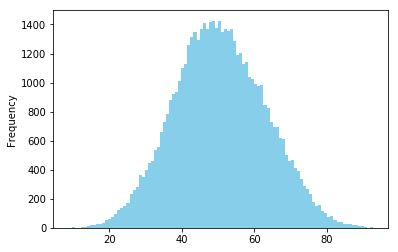

In [16]:
ta.data.RSI.plot(kind='hist', bins=100, color='skyblue')

In [9]:
return_labels = [col for col in ta.data.columns if 'return' in col and '+' in col]

In [10]:
return_labels

['+6P_return',
 '+24P_return',
 '+120P_return',
 '+240P_return',
 '+480P_return',
 '+2400P_return']

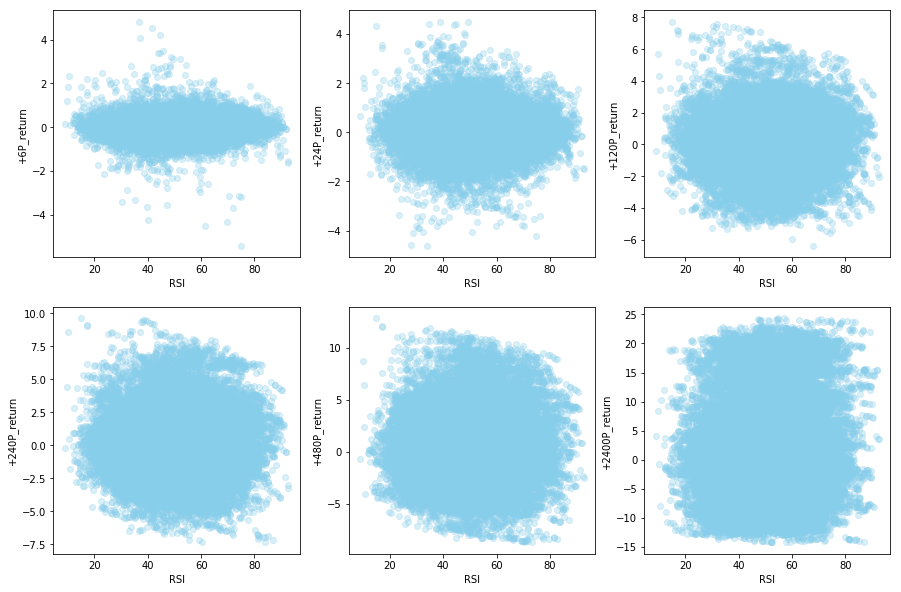

In [11]:
fig = plt.figure(figsize=(15, 10))
for i, r in enumerate(return_labels):
    ax = fig.add_subplot(2, 3, i+1)
    ax.scatter(ta.data.RSI, ta.data[r], color='skyblue', alpha=0.3)
    ax.set_xlabel('RSI')
    ax.set_ylabel(r)

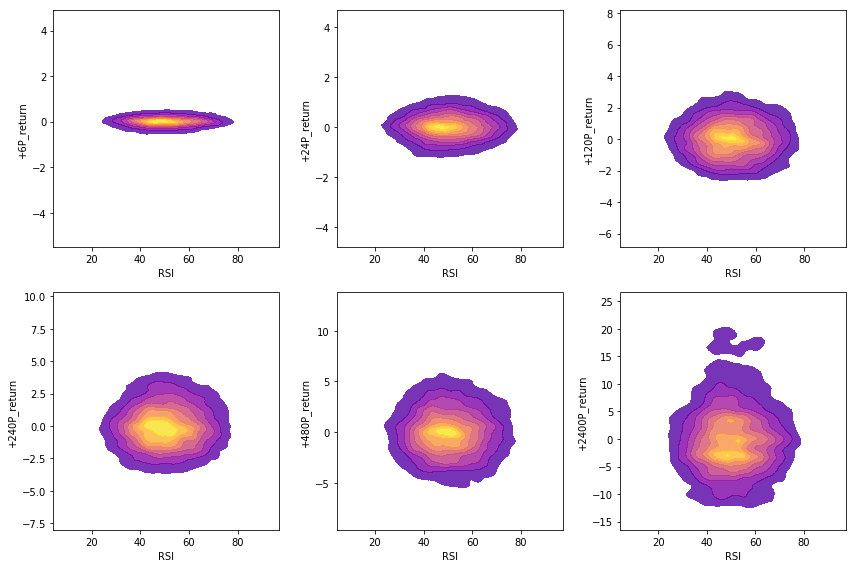

In [15]:
fig = plt.figure(figsize=(12, 8))
for i, r in enumerate(return_labels):
    ax = fig.add_subplot(2, 3, i+1)
    df = pd.concat([ta.data.RSI,  ta.data[r]], axis=1).dropna()
    sns.kdeplot(df.iloc[:, 0], df.iloc[:, 1],
                        cmap="plasma", shade=True, shade_lowest=False, alpha=0.8)
    ax.set_xlabel('RSI')
    ax.set_ylabel(r)
plt.tight_layout()

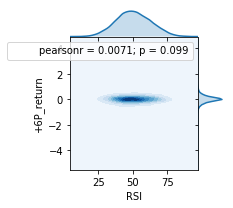

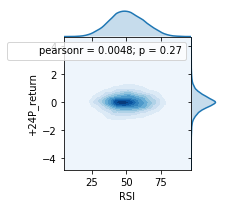

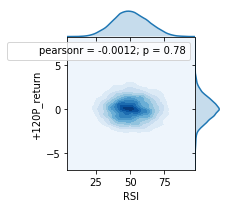

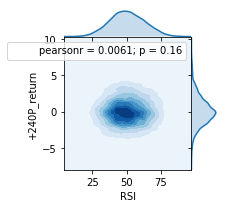

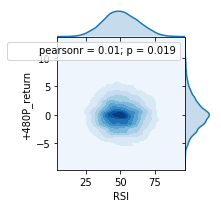

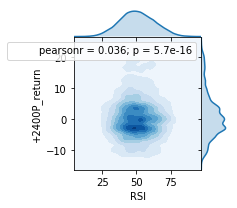

In [13]:
for i, r in enumerate(return_labels):
    df = pd.concat([ta.data.RSI,  ta.data[r]], axis=1).dropna()
    ax = sns.jointplot(df.iloc[:, 0], df.iloc[:, 1], kind="kde", size=3, space=0, cmap="Blues")